In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv("StudentPerformanceFactors.csv")
print(df.head())
print("Columns in dataset:", df.columns)


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [8]:
df.dropna(subset=["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"], inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

data = df.copy()

# Label encode all object (categorical) columns
label_encoders = {}
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le 


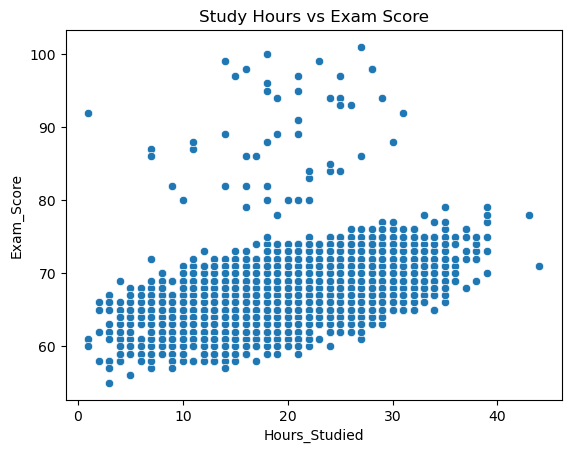

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x="Hours_Studied", y="Exam_Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

features = ["Hours_Studied", "Sleep_Hours", "Attendance", "Previous_Scores", 
            "Tutoring_Sessions", "Parental_Involvement", "Motivation_Level", "Internet_Access"]
X = data[features]
y = data["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R² Score: {r2}")

Linear Regression MSE: 5.809371643536585
Linear Regression R² Score: 0.6261503219474223


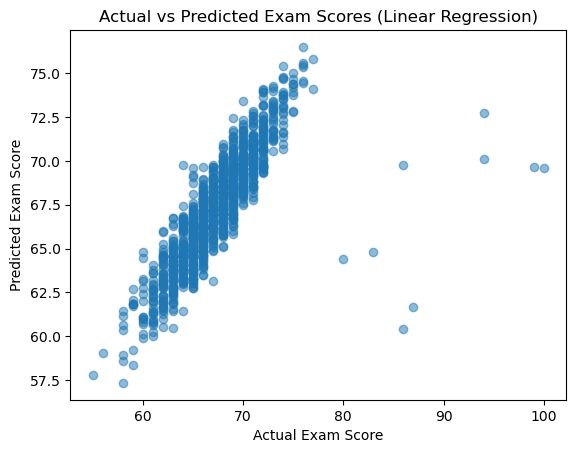

In [18]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Use the same features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)
y_pred_p = model_poly.predict(X_test_p)

mse_p = mean_squared_error(y_test_p, y_pred_p)
r2_p = r2_score(y_test_p, y_pred_p)

print(f"\nPolynomial Regression MSE: {mse_p}")
print(f"Polynomial Regression R² Score: {r2_p}")


Polynomial Regression MSE: 5.509462971927764
Polynomial Regression R² Score: 0.6454503026003864


In [22]:
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_poly3, y, test_size=0.2, random_state=42)

model_poly3 = LinearRegression()
model_poly3.fit(X_train_3, y_train_3)
y_pred_3 = model_poly3.predict(X_test_3)

mse_3 = mean_squared_error(y_test_3, y_pred_3)
r2_3 = r2_score(y_test_3, y_pred_3)

print(f"Degree 3 Polynomial MSE: {mse_3}")
print(f"Degree 3 Polynomial R² Score: {r2_3}")

Degree 3 Polynomial MSE: 5.774559778059253
Degree 3 Polynomial R² Score: 0.628390565040768


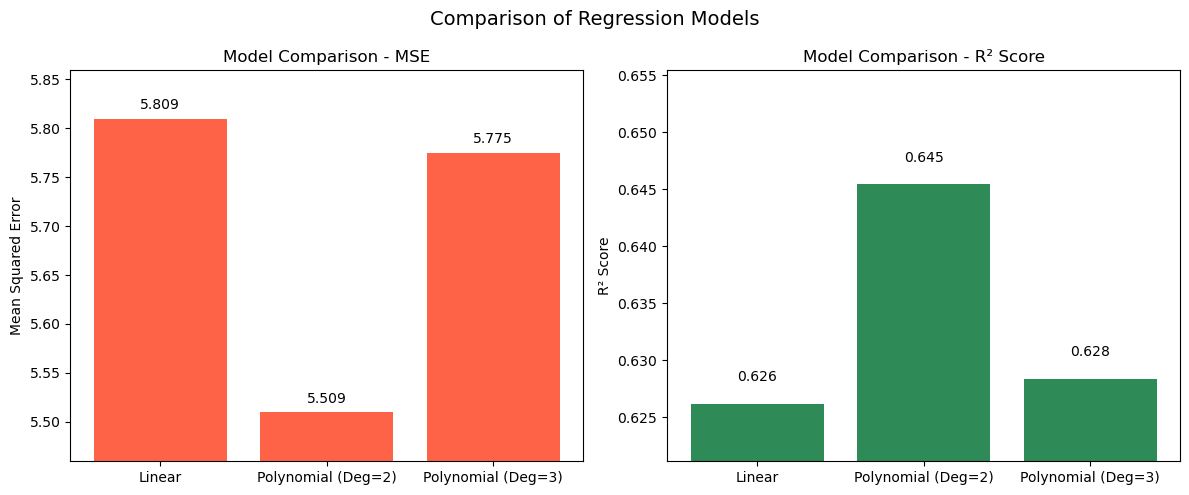

In [24]:
models = ["Linear", "Polynomial (Deg=2)", "Polynomial (Deg=3)"]
mse_scores = [mse, mse_p, mse_3]
r2_scores = [r2, r2_p, r2_3]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for MSE
axes[0].bar(models, mse_scores, color="tomato")
axes[0].set_title("Model Comparison - MSE")
axes[0].set_ylabel("Mean Squared Error")
axes[0].set_ylim(min(mse_scores) - 0.05, max(mse_scores) + 0.05)
for i, v in enumerate(mse_scores):
    axes[0].text(i, v + 0.01, f"{v:.3f}", ha='center')

# Bar chart for R² Score
axes[1].bar(models, r2_scores, color="seagreen")
axes[1].set_title("Model Comparison - R² Score")
axes[1].set_ylabel("R² Score")
axes[1].set_ylim(min(r2_scores) - 0.005, max(r2_scores) + 0.01)
for i, v in enumerate(r2_scores):
    axes[1].text(i, v + 0.002, f"{v:.3f}", ha='center')

# Overall layout
plt.suptitle("Comparison of Regression Models", fontsize=14)
plt.tight_layout()
plt.show()